In [1]:
from image_spliter import *

In [2]:
img_data = 'C:\\Users\\yukir\\Documents\\Monicas_workspace\\surface_detection\\dataset\\dataset_20180803\\b18_02.bmp'


screen_img, white_img, png_edge= get_ready(img_data, 'b18_02')

screen extraction complete, save as screen_img
edge extraction complete saved as white_img


C:\Users\yukir\anaconda3\envs\opencv\lib\site-packages\PIL\Image.py:2914: DecompressionBombWarning: Image size (101303668 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


background removed
Successful saved as png_edge


### edge_check

정상이미지 없이, threshold를 변환시킨 걸로 normal_img를 만들었기 때문에, 실제이미지와 비교했을 떄, 모든게 바뀐걸로 잡히는 듯  
##### 사용불가 

In [3]:
img = white_img.copy()
# show(img)

img = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)

#블러 02
#블러의 커널 사이즈가 홀수만 가능하므로 이미지 평균 값을 기준으로 홀수값 만들기
blur_k = int((img.mean()*0.5)//2)*2+1 
img = cv2.medianBlur(img, blur_k)

#threshold 적용을 위해 Lab에서 Grayscale로 이미지 변환 03
img = cv2.cvtColor(img, cv2.COLOR_Lab2BGR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#이미지 평균값을 기준으로 이진화 04
ret, img = cv2.threshold(img, 30, 255, cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# show(img)
back = cv2.imwrite('back.jpg',img)

In [4]:
back_img = cv2.imread('back.jpg', cv2.IMREAD_COLOR)

#### IMG reload

In [13]:
from skimage.metrics import structural_similarity as compare_ssim
import imutils
import argparse

In [24]:
white_img = cv2.imread("C:\\Users\\yukir\\Documents\\Monicas_workspace\\surface_detection\\edge_only_b18_02.jpg", cv2.IMREAD_COLOR)
back_img = cv2.imread('back.jpg', cv2.IMREAD_COLOR)

white_img.shape == back_img.shape

comp_img = cv2.cvtColor(white_img, cv2.COLOR_BGR2GRAY)
normal_img = cv2.cvtColor(back_img, cv2.COLOR_BGR2GRAY)

In [25]:
(score, diff) = compare_ssim(comp_img, normal_img, full=True)
# full=True: 이미지 전체에 대해서 구조비교를 수행한다.
diff = (diff * 255).astype('uint8')
print(f'SSIM: {score:.6f}')

SSIM: 0.863509


In [26]:
thresh = cv2.threshold(diff, 0, 200, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts, _ = cv2.findContours(
                thresh, 
                cv2.RETR_EXTERNAL, 
                cv2.CHAIN_APPROX_SIMPLE
              )
for c in cnts:
    area = cv2.contourArea(c)
    if area > 40:
        x, y, w, h = cv2.boundingRect(c)
        cv2.rectangle(white_img, (x, y), (x + w, y + h), (0, 0, 255), 20)
        cv2.drawContours(back_img, [c], -1, (0, 255, 0), 20)

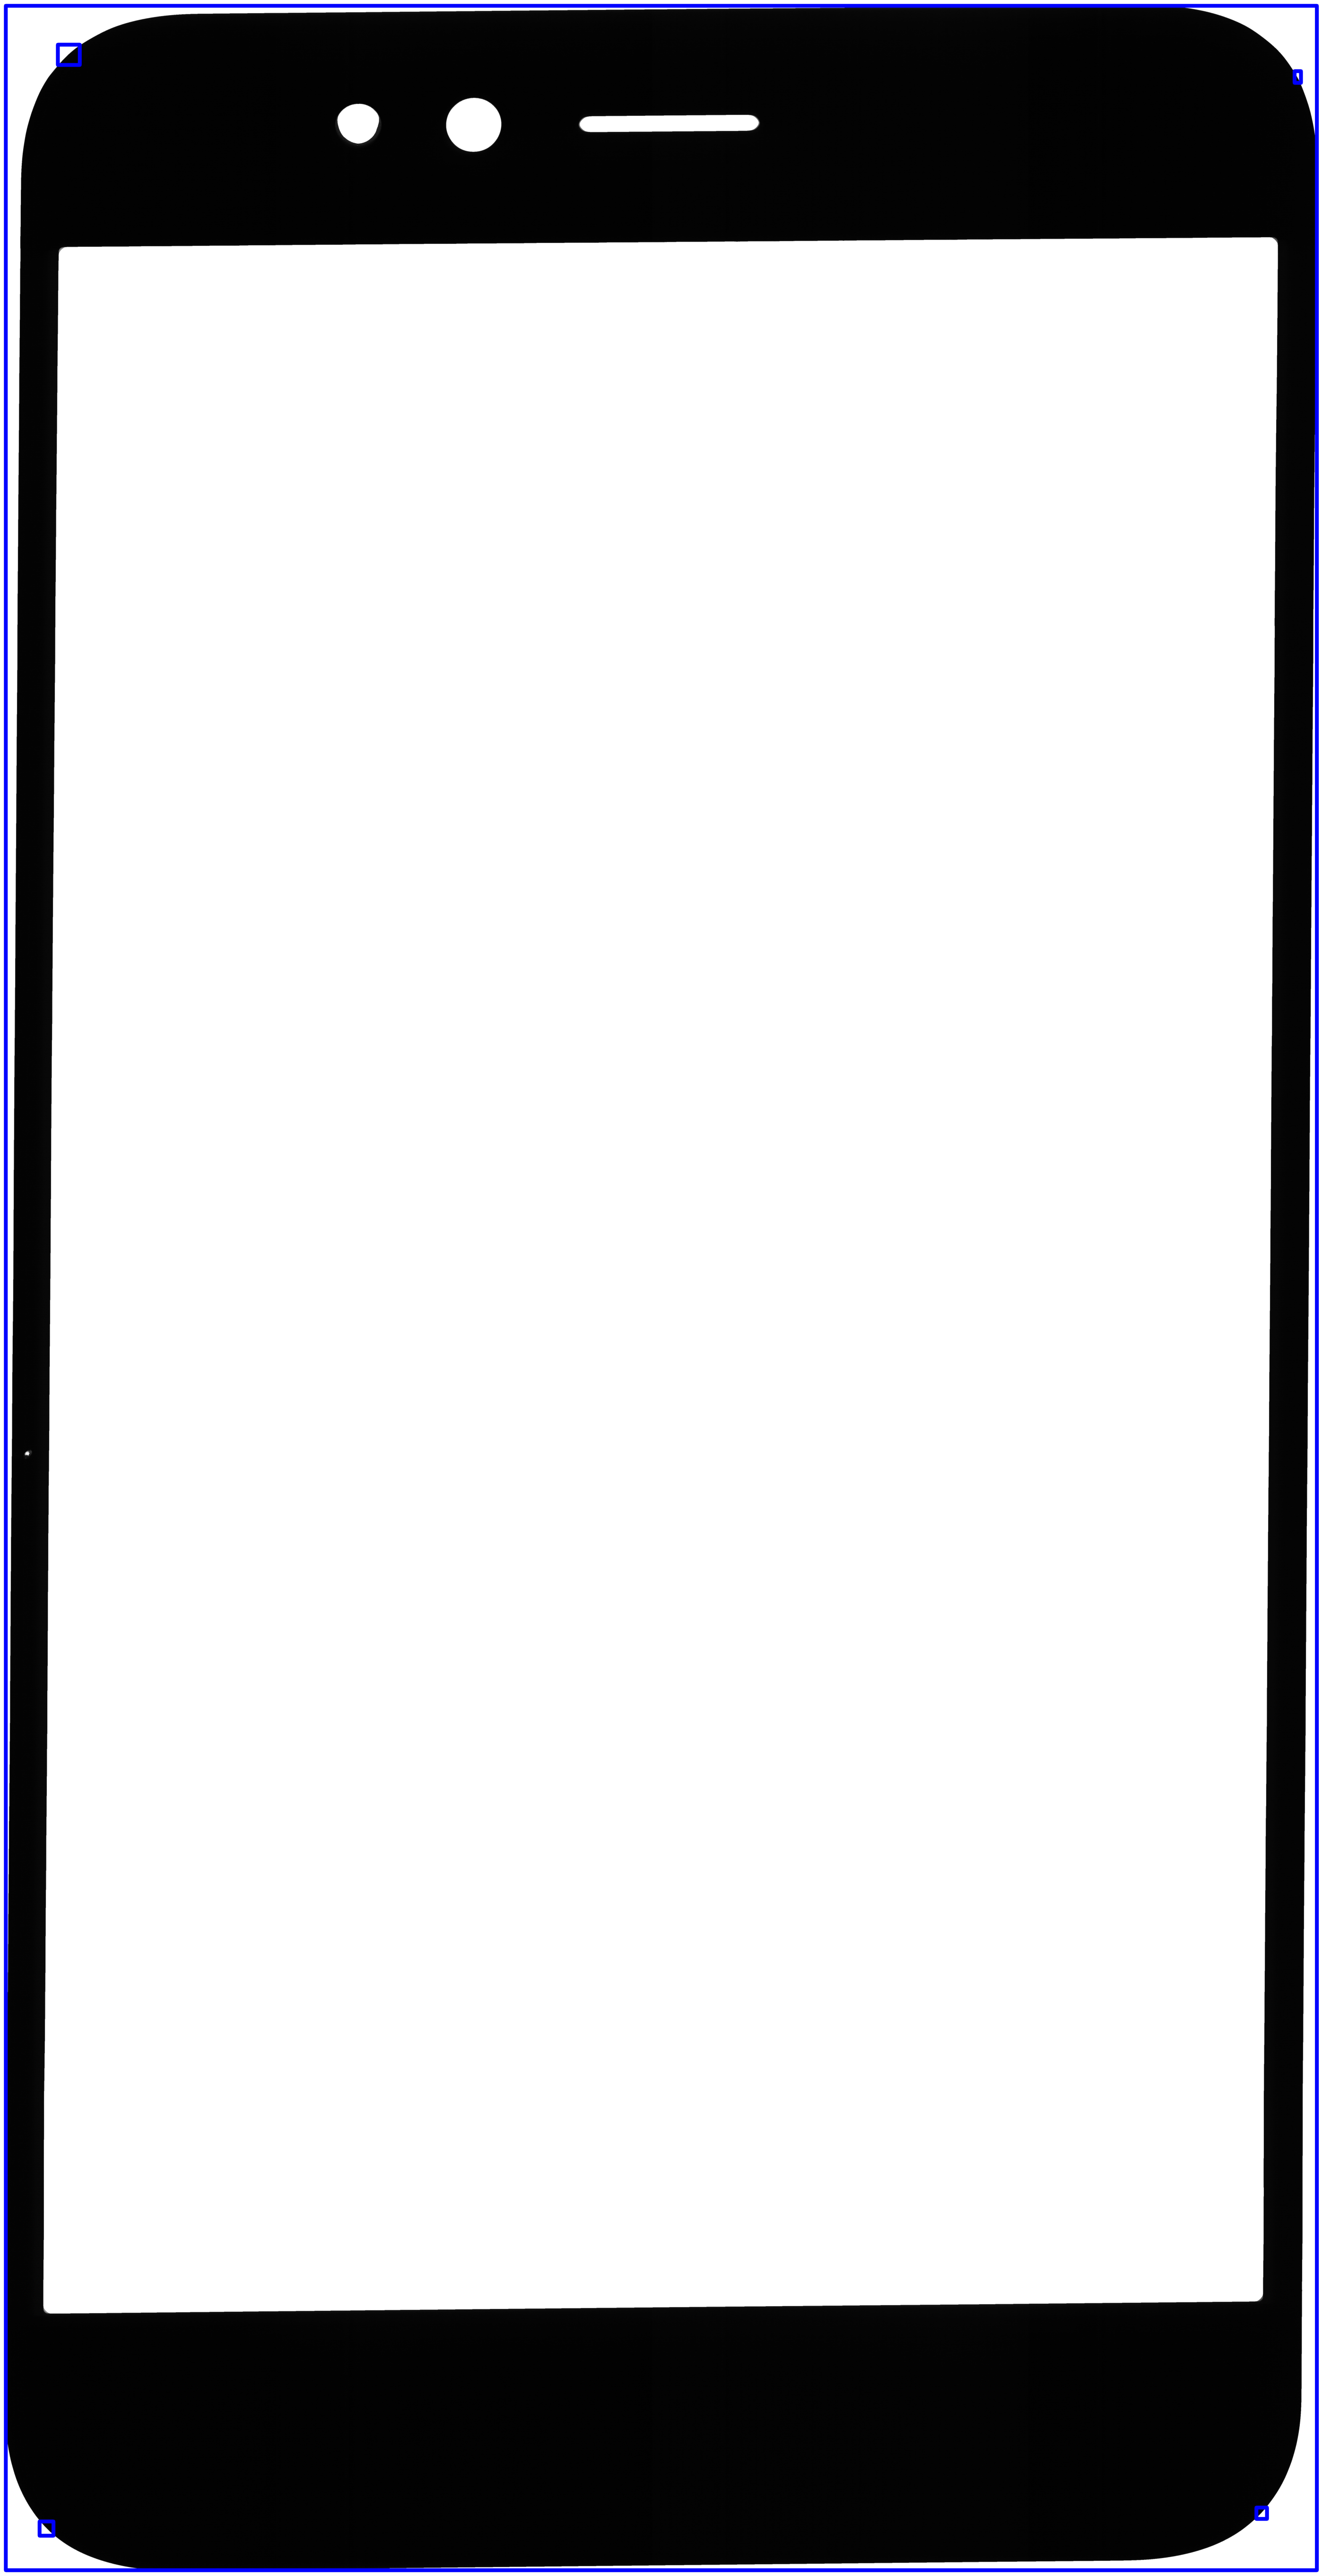

In [27]:
show(white_img)

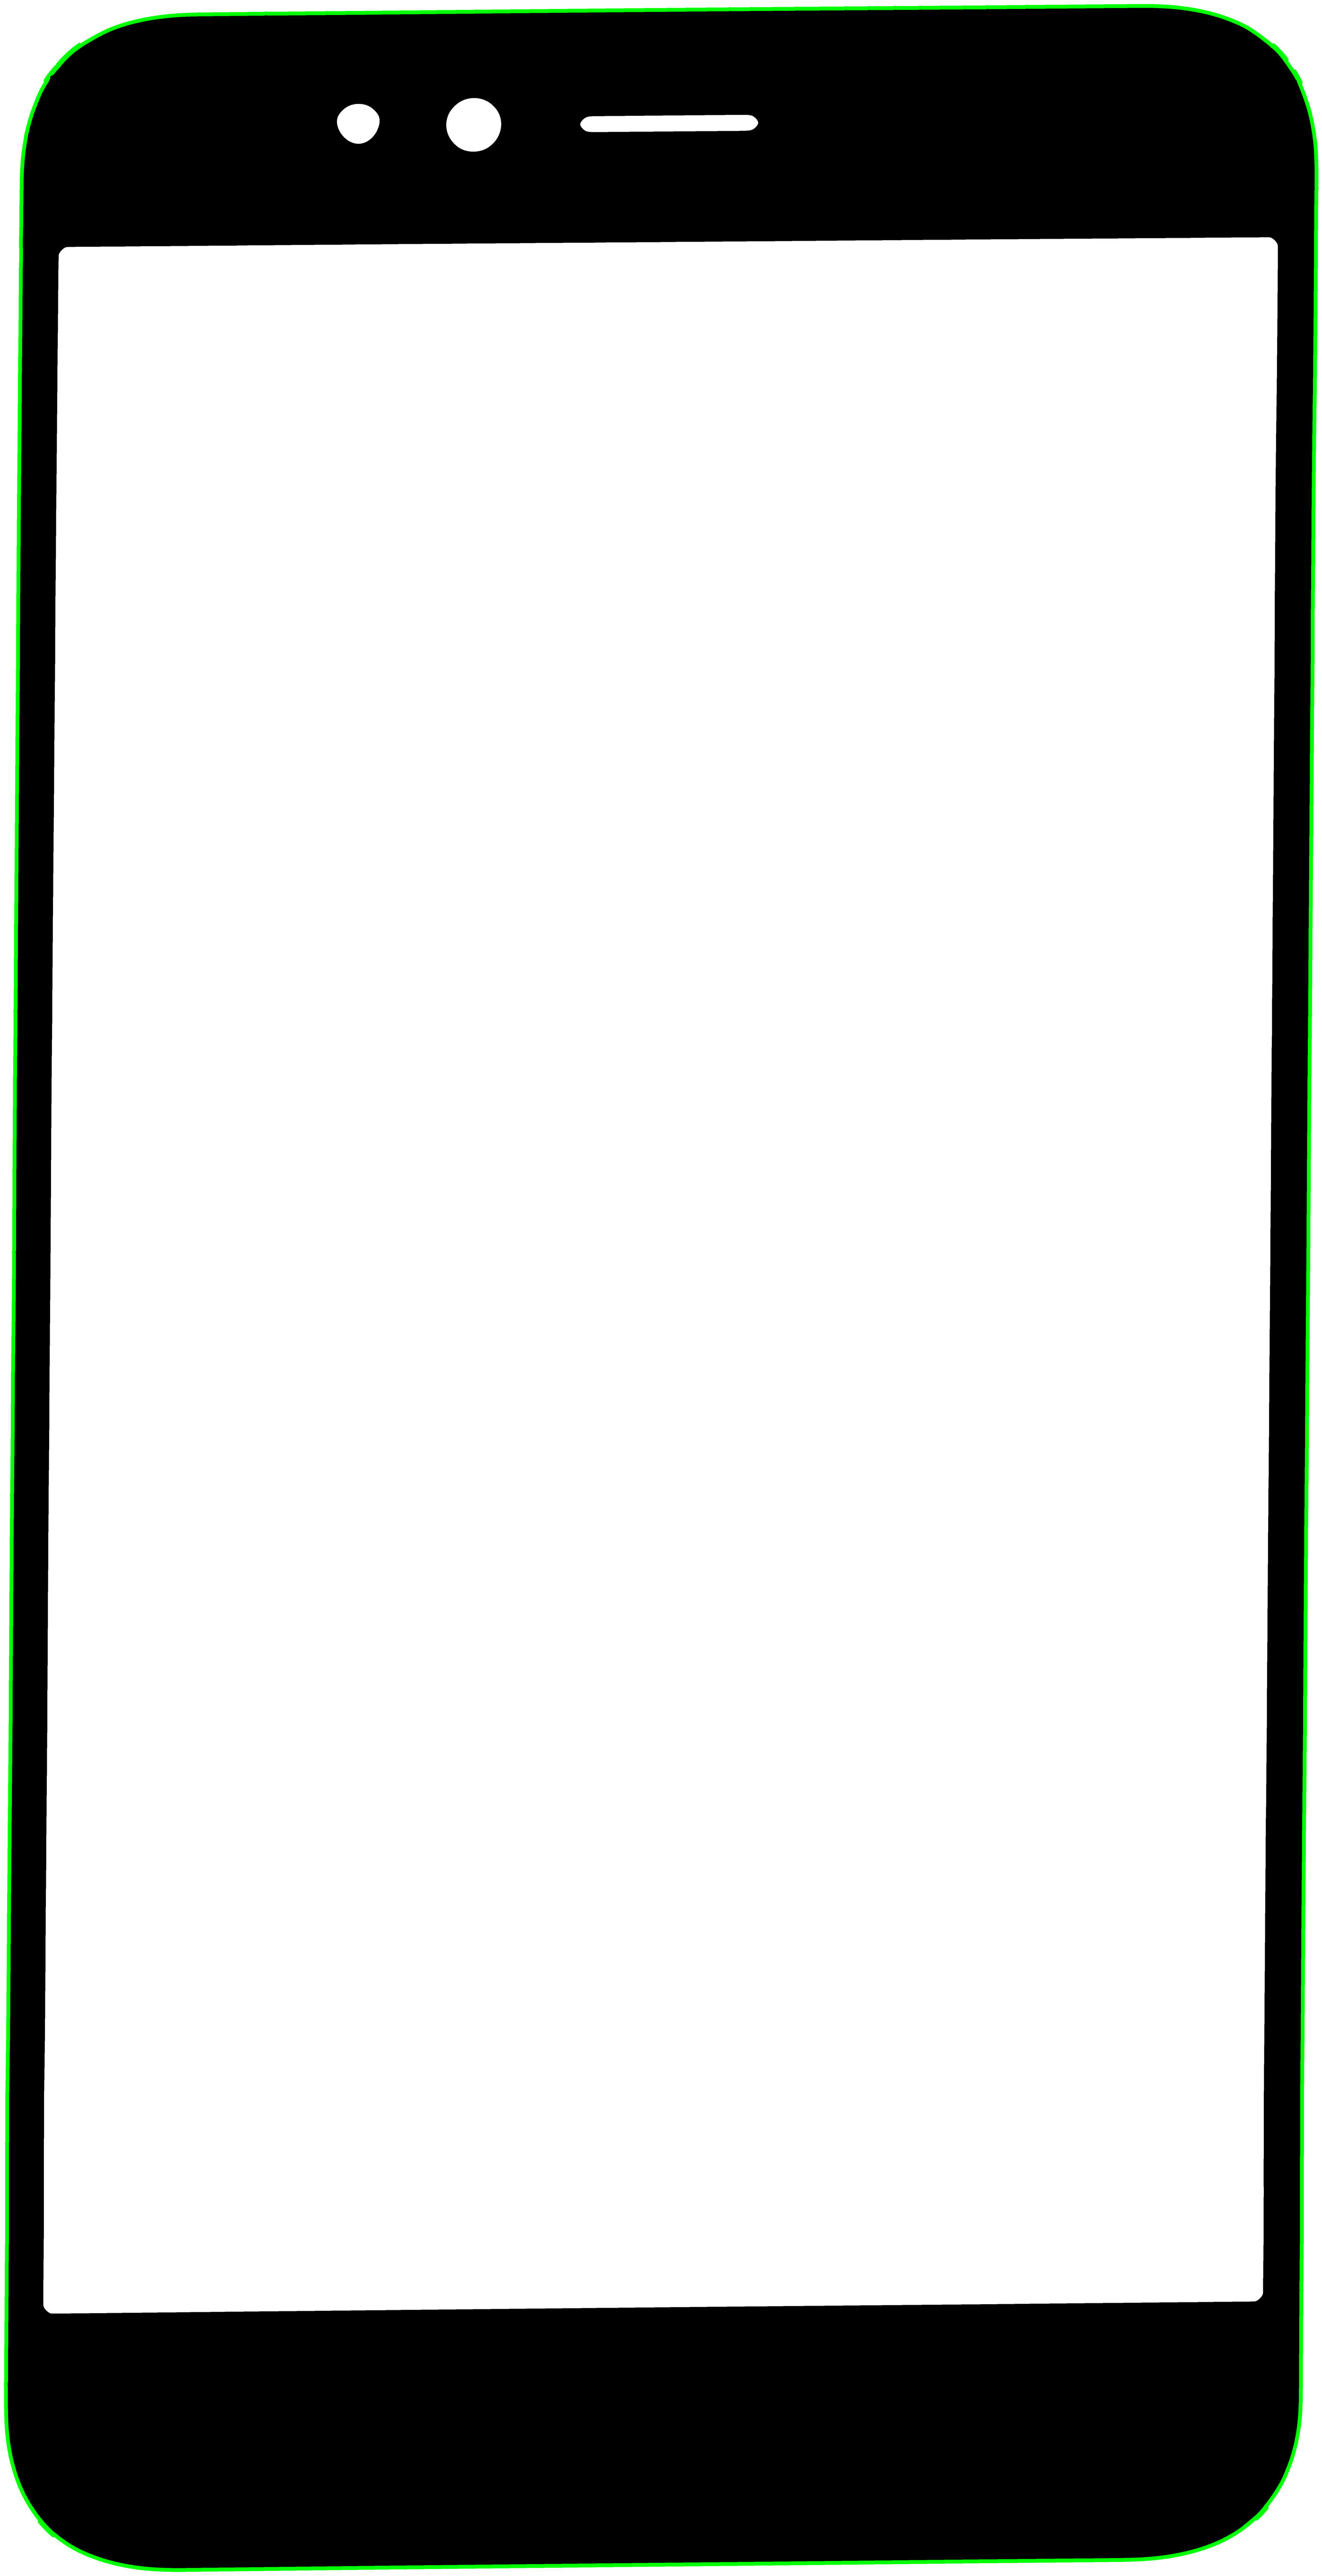

In [28]:
show(back_img)